Al abrir el JSON en VS hemos observado que  tiene una estructura anidada  Cada clave (ejemplo: "3", "4", "5") tiene una lista de datos. Cada elemento de esa lista es un diccionario con una clave y un valor: t_id con valor una imagen y duracion con un numero de minutos. Lo que queremos hacer es convertir este jason en un Dataframe, una tabla, que recoja esta informacion y con la que podamos trabajar en Pandas. Los Headers de las columnas van a ser las claves, y las filas van a ser los valores.

In [ ]:
#Importar Librerias
import pandas as pd
import json
import numpy as np

# COmo el json es complejo lo vamos a leer tal cual es, como un diccionario

#leer json de manera estandard - hemos encontrado ese trozo de codigo en bibliografia

with open("/content/id_visitante-duracion.json", "r", encoding="utf-8") as file:
    datos = json.load(file)

# Ver estructura y efectivamente es un diccionario
print(type(datos))

#creamos una lista vacia para almacenar los datos
datos_duracion =[]

#a las primeras claves, los numeros que contienen las listas dentro , la llamaremos ¨tipo¨ porque no sabemos que es
#hacemos un doble for (for dentro de for) - primero recorremos las claves numericas y luego las listas dento de cada clave
for tipo , lista in datos.items(): #recorremos cada diccionario con clave numerica : primera vuelta 3, segunda 4 etc
  for elemento_listas in lista: #recorremos cada diccionario dentro de esa lista
     elemento_listas["tipo"] = int(tipo)
     datos_duracion.append(elemento_listas)

df_duracion=pd.DataFrame(datos_duracion)
df_duracion.head(20)

print(df_duracion.shape)
print(df_duracion["duracion"].describe())
df_duracion.columns

<class 'dict'>
(35887, 3)
count    35887.000000
mean       359.748934
std        100.122517
min        -39.000000
25%        292.000000
50%        359.000000
75%        428.000000
max        811.000000
Name: duracion, dtype: float64


Index(['t_id', 'duracion', 'tipo'], dtype='object')

Limpiamos la columna de duracion, para entender un poco mejor que conclusiones podemos sacar

t_id        object
duracion     int64
tipo         int64
dtype: object
count    34607.000000
mean       351.598607
std         92.049257
min          1.000000
25%        289.000000
50%        355.000000
75%        419.000000
max        540.000000
Name: duracion, dtype: float64


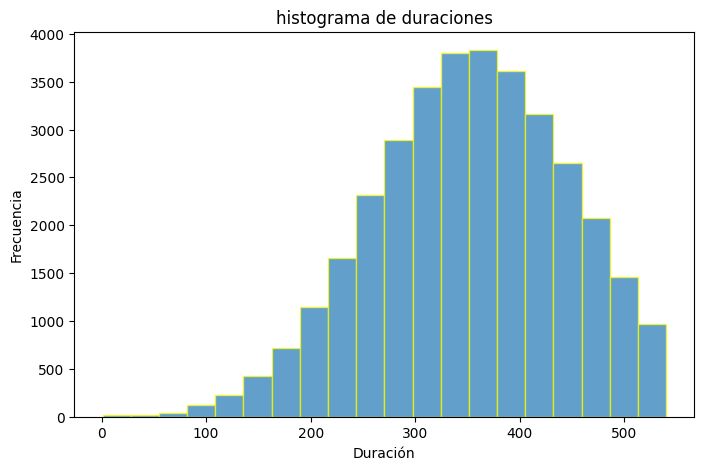

In [ ]:
#eliminamos ese valor negativo y volvemos a describir
df_duracion = df_duracion[df_duracion["duracion"] >= 0]


#también el proyecto nos dice que no podemos esperar una estancia mayor a 9 horas, lo que son 540 min.
#vamos a eliminar esos valores
df_duracion = df_duracion[df_duracion["duracion"] <= 540]

#convertimos a int porque ocupan menos y son minutos, no necesitamos decimales

df_duracion = df_duracion.dropna() #eliminar nules, no parece que tenga :D
df_duracion["duracion"] = df_duracion["duracion"].astype(int)
print(df_duracion.dtypes)

# Ruta donde guardar el CSV en Drive
ruta_csv = "/content/id_visitante-duracion_limpio.csv"

# Guardar como CSV
df_duracion.to_csv(ruta_csv, index=False, encoding="utf-8", sep=";")
print(df_duracion["duracion"].describe())

#vamos a ver un histograma
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(df_duracion["duracion"], bins=20, edgecolor="yellow", alpha=0.7)
plt.xlabel("Duración")
plt.ylabel("Frecuencia")
plt.title("histograma de duraciones" )
plt.show()